In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
import recmetrics
import ml_metrics as metrics

In [2]:
#Importing the dataset
ratings_data=pd.read_csv("ratings_Clothing_Shoes_and_Jewelry.csv",names=['userId', 'productId','Rating','timestamp'])
#Dropping the TimeStamp Column
ratings_data.drop(['timestamp'], axis=1,inplace=True)

In [3]:
#View the Data
ratings_data.head(15)

,userId,productId,Rating
0,A2XVJBSRI3SWDI,0000031887,5.0
1,A2G0LNLN79Q6HR,0000031887,4.0
2,A2R3K1KX09QBYP,0000031887,2.0
3,A19PBP93OF896,0000031887,1.0
4,A1P0IHU93EF9ZK,0000031887,4.0
5,A3Q6CTO56DJ8UZ,0000031887,4.0
6,A1KLRMWW2FWPL4,0000031887,5.0
7,A1GQPAM8Y45QN7,0000031887,5.0
8,A2G5TCU2WDFZ65,0000031887,5.0
9,AEAN37KUOYSX4,0000031887,5.0


In [4]:
#Returns shape of the dataset
ratings_data.shape

(5748920, 3)

In [5]:
#Returns shape of the dataset
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748920 entries, 0 to 5748919
Data columns (total 3 columns):
userId       object
productId    object
Rating       float64
dtypes: float64(1), object(2)
memory usage: 131.6+ MB


In [6]:
# 5 Point summary for the data
ratings_data.describe()['Rating'].T

count    5.748920e+06
mean     4.144679e+00
std      1.233103e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x212c76cd9e8>,
 'caps': [<matplotlib.lines.Line2D at 0x212c76cde10>,
 'boxes': [<matplotlib.lines.Line2D at 0x212c76cd5c0>],
 'medians': [<matplotlib.lines.Line2D at 0x212c76e5748>],
 'fliers': [<matplotlib.lines.Line2D at 0x212c76e5a90>],
 'means': []}

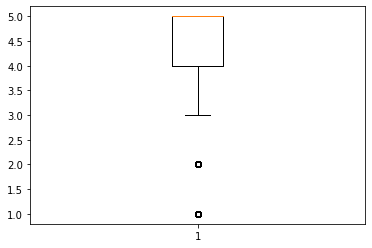

In [7]:
#Boxplot of the dataset
plt.boxplot(ratings_data['Rating'])

In [8]:
#no of null values present in each column
ratings_data.isnull().sum()

userId       0
productId    0
Rating       0
dtype: int64

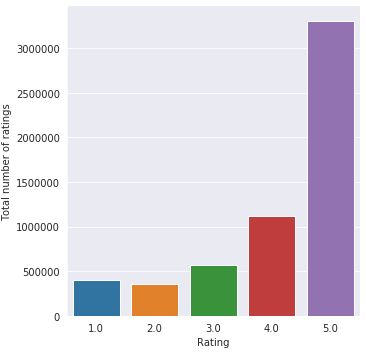

In [9]:
#Bar Graph for total Number of reviews for a particular rating
#Distribution of the rating

with sns.axes_style('darkgrid'):
    rating_plot = sns.catplot("Rating", data=ratings_data, kind='count')
    rating_plot.set_ylabels("Total number of ratings")

In [10]:
#Most of the people have given a 5 star rating
print("Total no of ratings :",ratings_data.shape[0])
print("Total No of unique users   :", len(np.unique(ratings_data.userId)))
print("Total No of unique products  :", len(np.unique(ratings_data.productId)))

Total no of ratings : 5748920
Total No of unique users   : 3117268
Total No of unique products  : 1136004


In [11]:
#Analysis of rating given by the user 
user_diversity_scan= ratings_data.groupby(by='userId')['Rating'].count().sort_values(ascending=False)
#Display the head of the data
user_diversity_scan.head(10)

userId
A3W4D8XOGLWUN5    349
A5QQRB2QOY96U     289
A2KBV88FL48CFS    278
A1Z4LX3Q1YMF84    274
A1RRMZKOMZ2M7J    259
A2J4XMWKR8PPD0    256
A2EA0JE6LV4BXH    249
A2GA55P7WGHJCP    240
A1XQ0F01CF84Y3    225
A29BPMJI0ZYH4H    197
Name: Rating, dtype: int64

In [12]:

user_diversity_scan.tail(10)

userId
A39NIYCJLGWPQ            1
A39NIPDP99E6BO           1
A39NIL48689N78           1
A39NIIUZYLV875           1
A39NIHHIV1YB5I           1
A39NI5DLRB306C           1
A39NI4NAMU8Q90           1
A39NI0FS63CQ28           1
A39NHWRT04N6KQ           1
A000008615DZQRRI946FO    1
Name: Rating, dtype: int64

In [13]:
# A summary of the data
user_diversity_scan.describe()

count    3.117268e+06
mean     1.844217e+00
std      2.448089e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.490000e+02
Name: Rating, dtype: float64

In [14]:
print(' No of users who rated more than 100 items : {}'.format(sum(user_diversity_scan >= 100)))

 No of users who rated more than 100 items : 69


In [ ]:
# Popularity based recommendation system works with the trend. It basically uses the items which are
# in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may 
# suggest that item to the user who just signed up.

# The problems with popularity based recommendation system is that the personalization is not available with this
# method i.e. even though you know the behaviour of the user you cannot recommend items accordingly.

In [15]:
# No of Rating per product 
# This metric says something about the popularity a particular product have
product_popularity_scan= ratings_data.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

product_popularity_scan.head(10)

productId
B0058XIMMM    3047
B000FBO0DM    2836
B000NZW3J8    2797
B005LERHD8    2781
B006PGGJOE    2773
B000T9VK56    2685
B00012O12A    2214
B0000C321X    2105
B000O32MLI    2057
B000XDDERK    1861
Name: Rating, dtype: int64

In [16]:

product_popularity_scan.describe()

count    1.136004e+06
mean     5.060651e+00
std      2.326025e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      3.047000e+03
Name: Rating, dtype: float64

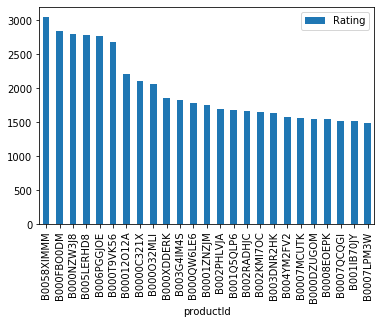

In [17]:
# Bar Graphs for maximum rated(most popular) products
maximum_rated_products = pd.DataFrame(ratings_data.groupby('productId')['Rating'].count())
popularity_based_recommendations = maximum_rated_products.sort_values('Rating', ascending=False)
popularity_based_recommendations.head(25).plot(kind = "bar")


In [18]:
# Filtering products that have rating count more than 500

product_database=ratings_data.groupby("productId").filter(lambda x:x['Rating'].count() >=500)

In [19]:
product_database

,userId,productId,Rating
4190,AEM45GA7TJF8Q,B00005TQI7,5.0
4191,AGHU1DV26R98T,B00005TQI7,5.0
4192,A2FOSARZ6AKJ4O,B00005TQI7,5.0
4193,A348RCUM2SSDCW,B00005TQI7,4.0
4194,A2OPGDTV2JN8Z3,B00005TQI7,5.0
4195,A3KNXWG1ZGUWW2,B00005TQI7,4.0
4196,A3U1IA14RNC59I,B00005TQI7,1.0
4197,AMPZS9I8LHHG9,B00005TQI7,4.0
4198,A2GM68OFNAYOEW,B00005TQI7,5.0
4199,A17DDEVH3YM3NL,B00005TQI7,5.0


In [20]:
ratings_per_product = product_database.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

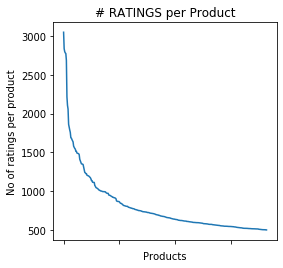

In [21]:

figure = plt.figure(figsize=plt.figaspect(1))
ax = plt.gca()
plt.plot(ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Products')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])
# Frequency Distribution Graph - ratings per product

plt.show()

In [22]:
#average rating of a product sorted in order of the ratings

product_database.groupby('productId')['Rating'].mean().sort_values(ascending=False).head()

productId
B008KK0ZJ8    4.818489
B000XPIZPE    4.776824
B0013KDS96    4.753469
B009ZDEXQK    4.727639
B000EIJG0I    4.721457
Name: Rating, dtype: float64

In [23]:
mean_ratings = pd.DataFrame(product_database.groupby('productId')['Rating'].mean())
mean_ratings['rating_counts'] = pd.DataFrame(product_database.groupby('productId')['Rating'].count())
#introducting a column with the total number of ratings for a particular product

mean_ratings.head()

,Rating,rating_counts
productId,,
B00005TQI7,4.497537,609
B00006XXGO,4.518791,1224
B000072UMJ,4.501527,1310
B000074RL3,4.502783,539
B000086910,4.009398,532


<Figure size 720x540 with 0 Axes>

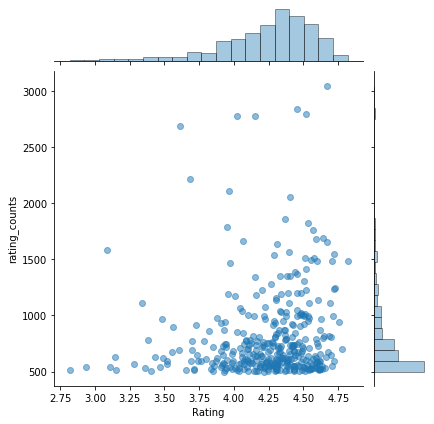

In [24]:
plt.figure(figsize=(10,7.5))
plt.rcParams['patch.force_edgecolor'] = True
#Joint Plot

sns.jointplot(x='Rating', y='rating_counts', data=mean_ratings, alpha=0.5)

In [25]:
#Reading and Splitting the dataset for collaborative filtering test

product_databaseSmall=product_database.sample(frac=0.06)
data = Dataset.load_from_df(product_databaseSmall,Reader(rating_scale=(1, 5)))
trainset, testset = train_test_split(data, test_size=.30)


In [26]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
# Here we are using USER BASED COLLABORATIVE FILTERING
userusercollaborativefiltering = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': True})
userusercollaborativefiltering.fit(trainset)
trainset.n_users

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


12416

In [27]:
# Predictions Based on the User based filtering

test_pred = userusercollaborativefiltering.test(testset)
print("User-based Model : Test Set RMSE score")
# get RMSE - Root Mean Square Error

accuracy.rmse(test_pred, verbose=True)



User-based Model : Test Set RMSE score
RMSE: 1.1715


1.1714935408626816

In [28]:
# Here we are using ITEM BASED COLLABORATIVE FILTERING

itembasedcollaborativefiltering = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
itembasedcollaborativefiltering.fit(trainset)
test_pred_I = itembasedcollaborativefiltering.test(testset)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [29]:
print("Item-based Model : Test Set RMSE score")
accuracy.rmse(test_pred_I, verbose=True)

Item-based Model : Test Set RMSE score
RMSE: 1.1671


1.167098025657279

In [ ]:
# Utility Matrix based on products sold and user reviews
# Utility Matrix : An utlity matrix is consists of all possible user-item preferences (ratings) details represented
# as a matrix. The utility matrix is SPARSE as none of the users would buy all the items in the list, hence, most 
# of the values are unknown.

In [30]:
# We have filled the unknown values with zero 

collaborative_recommending_matrix = product_database.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)
collaborative_recommending_matrix.head()

productId,B00005TQI7,B00006XXGO,B000072UMJ,B000074RL3,B000086910,B00009ZM7Z,B0000ANHST,B0000AT7N2,B0000ATP8L,B0000C321X,...,B00BKEQBI0,B00BXH3ZMO,B00CIBCJ62,B00CKGB85I,B00D1MR8YU,B00D86D4L0,B00DNQIIE8,B00DQYNS3I,B00DSV2ESE,B00FJ5LI3O
userId,,,,,,,,,,,,,,,,,,,,,
A0002696N8BSFGJBGVFN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00064201V77I44TYDVC9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A000979615F1DW010JA4U,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A001114613O3F18Q5NVR6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00115942KQCYA4V5THGW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Shape of the collaborative Recommending matrix

collaborative_recommending_matrix.shape

(276262, 365)

In [32]:
#Taking the Transpose to look at it with a different perspective

product_based_matrix = collaborative_recommending_matrix.T
product_based_matrix.head()

userId,A0002696N8BSFGJBGVFN,A00064201V77I44TYDVC9,A000979615F1DW010JA4U,A001114613O3F18Q5NVR6,A00115942KQCYA4V5THGW,A00123503TDGU55J1GVO6,A0015694335OXH5GUHFTH,A00182301XMDX20WTL4DB,A002043023IWSITS68QKB,A00219682P7VSC0F8HLCU,...,AZZT1ERHBSNQ8,AZZTNXCPKZKGZ,AZZTOUKVTUMVM,AZZU6NXB8YJN9,AZZUJP2VVO8A5,AZZVXTYIUGMBH,AZZW5X2SP48SI,AZZW7QHJZP3TY,AZZWQ3PROSDHL,AZZY5UXXCEH60
productId,,,,,,,,,,,,,,,,,,,,,
B00005TQI7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00006XXGO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000072UMJ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000074RL3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000086910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Decomposing the Matrix

SVD = TruncatedSVD(n_components=10)
reduced_matrix = SVD.fit_transform(product_based_matrix)
reduced_matrix.shape

(365, 10)

In [34]:
# Correlation Matrix

correlation_data_product = np.corrcoef(reduced_matrix)
correlation_data_product.shape

(365, 365)

In [35]:
product_based_matrix.index[24]

'B0006LMBJ6'

In [36]:
i = product_based_matrix.index[24]
# Index # of product ID purchased by customer

product_names = list(product_based_matrix.index)
product_ID = product_names.index(i)
product_ID


24

In [37]:
# Correlation for all items with the item purchased by this customer based on items rated by other 
# customers who bought the same product
correlation_product_ID = correlation_data_product[product_ID]
correlation_product_ID.shape

(365,)

In [38]:
Recommend_product = list(product_based_matrix.index[correlation_product_ID > 0.80])
# Recommending top 10 highly correlated products in sequence


Recommend_product.remove(i) 

Recommend_product[0:9]

['B0007SUEVA', 'B0007XA0FU', 'B005QG52VA', 'B0091KYB2I']

In [39]:
ratings_dataSmall=product_database.sample(frac=0.06)


In [40]:
ratings_per_user = ratings_dataSmall.groupby(by='userId')['Rating'].count().sort_values(ascending=False)

In [41]:
collaborative_recommending_matrix_user = ratings_dataSmall.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)
collaborative_recommending_matrix_user.head()

productId,B00005TQI7,B00006XXGO,B000072UMJ,B000074RL3,B000086910,B00009ZM7Z,B0000ANHST,B0000AT7N2,B0000ATP8L,B0000C321X,...,B00BKEQBI0,B00BXH3ZMO,B00CIBCJ62,B00CKGB85I,B00D1MR8YU,B00D86D4L0,B00DNQIIE8,B00DQYNS3I,B00DSV2ESE,B00FJ5LI3O
userId,,,,,,,,,,,,,,,,,,,,,
A00182301XMDX20WTL4DB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0098091BJTGBSZSDITU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01065233KUPCIYWANZ76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01365881N7KSJGEU9JYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0171728VHHTCKK3LCKA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
SVD = TruncatedSVD(n_components=10)
reduced_matrix = SVD.fit_transform(collaborative_recommending_matrix_user)
reduced_matrix.shape

(17706, 10)

In [43]:
correlation_data_user = np.corrcoef(reduced_matrix)
correlation_data_user.shape

(17706, 17706)

In [44]:
collaborative_recommending_matrix_user.index[371]

'A12PA62ARJTV5C'

In [45]:
i_user = collaborative_recommending_matrix_user.index[371]

user_names = list(collaborative_recommending_matrix_user.index)
user_ID = user_names.index(i_user)
user_ID


371

In [46]:
correlation_user_ID = correlation_data_user[user_ID]
correlation_user_ID.shape

(17706,)

In [47]:
Recommend = list(collaborative_recommending_matrix_user.index[correlation_user_ID > 0.70])


# Recommend.remove(i) 

Recommend[0:15]

['A00182301XMDX20WTL4DB',
 'A0524085AJLJ9MOW3OPN',
 'A1008EEMWRT7DD',
 'A103BJIOJSDJL1',
 'A10E7A9E17ISQO',
 'A10EACLLH0JMSZ',
 'A10HPTPP5DK8WN',
 'A10IOHN3DR8UCD',
 'A10KTLBQJPJMLQ',
 'A10MDNJHQGS8WO',
 'A10O3VW3K1GH20',
 'A10QVFB0X2T11Z',
 'A10V230Q1S763H',
 'A116E017SGNJC5',
 'A11BBO51J5AC82']

In [48]:
list1=[]
list2=[]
for index,row in ratings_dataSmall.iterrows():
    if row['userId'] in Recommend[0:15]:
        list1.append(row['productId'])
for index,row in ratings_dataSmall.iterrows():
    if row['userId']==collaborative_recommending_matrix_user.index[371]:
        list2.append(row['productId'])
        

recommendations=[]
for item in list1:
    if item not in list2:
        recommendations.append(item)
        print(item)

B004YM2FV2
B004YM2FV2
B001IV5B2M
B00DQYNS3I
B006FDADSK
B003DNR4XC
B000EX15NY
B000KD44G8
B000KD44G8
B0032OU5DI
B006FDADSK
B0001ZNZJM
B00075ZYRW
B000ZP6N7O
B004YM2FV2
B004YM2FV2


In [49]:
recommendations_with_item=[]
for item in list1:
    if item not in list2:
        for item2 in list2:
            if correlation_data_product[product_names.index(item2)][list(product_based_matrix.index).index(item)] >=0.50:
                recommendations_with_item.append(item)
                print(item)
                break

B00DQYNS3I
B000EX15NY
B0032OU5DI


In [50]:
print('Average precision at 3 for popularity ',metrics.mapk(list2,popularity_based_recommendations.head(25),3) )
print('Average precision at 3 for item-item',metrics.mapk(list2,Recommend_product,3) )
print('Average precision at 3 for user-user ',metrics.mapk(list2,recommendations,3) )

Average precision at 3 for popularity  0.0
Average precision at 3 for item-item 0.6666666666666666
Average precision at 3 for user-user  0.6666666666666666


In [51]:
pop_mark = []
for K in np.arange(1, 10):
    pop_mark.extend([recmetrics.mark(list2, popularity_based_recommendations.head(25), k=K)])
pop_mark

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [52]:
item_mark = []
for K in np.arange(1, 10):
    item_mark.extend([recmetrics.mark(list2, Recommend_product, k=K)])
item_mark

[0.1,
 0.2,
 0.2,
 0.2,
 0.26,
 0.32666666666666666,
 0.32666666666666666,
 0.32666666666666666,
 0.32666666666666666]

In [53]:
user_mark = []
for K in np.arange(1, 10):
    user_mark.extend([recmetrics.mark(list2, recommendations , k=K)])
user_mark

[0.1, 0.2, 0.2, 0.2, 0.26, 0.26, 0.26, 0.26, 0.26]

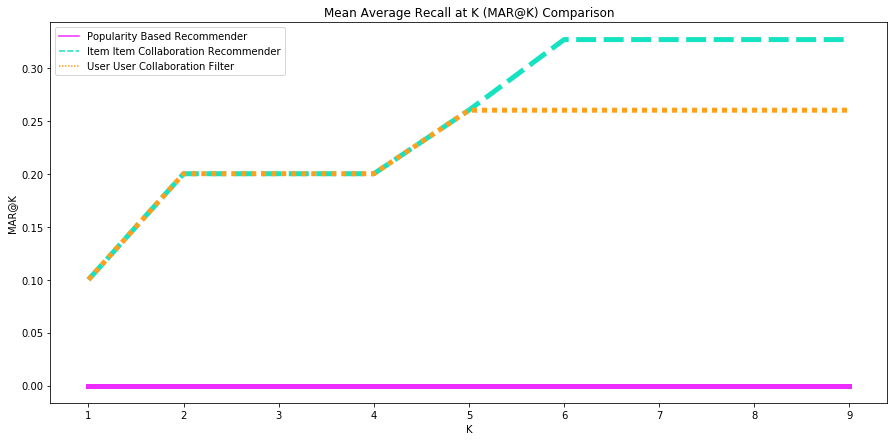

In [54]:

mark_scores = [pop_mark, item_mark, user_mark]
index = range(1,10)
names = ['Popularity Based Recommender', 'Item Item Collaboration Recommender', 'User User Collaboration Filter']

fig = plt.figure(figsize=(15, 7))
recmetrics.mark_plot(mark_scores, model_names=names, k_range=index)